# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**

Due Date : 10/14 (October 14th), 11:59 PM EST

## Name: Clarence Jiang

## UNI: yj2737

## The Dataset

### Acknowledgements

Big Thanks to https://www.superdatascience.com/pages/deep-learning

Banner Photo by Sharon McCutcheon on Unsplash

### Description

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [2]:
## YOUR CODE HERE
df = pd.read_csv("HW2_dataset.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771.0,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516.0,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709.0,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**1.2: Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping)**

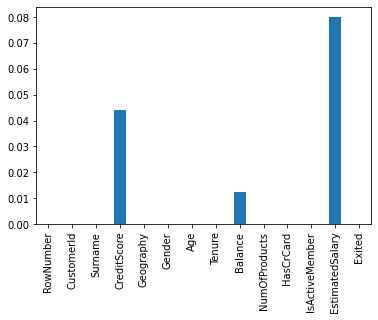

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516.0,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709.0,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
## YOUR CODE HERE
series = df.isna().sum()/len(df)
series.plot.bar()
plt.show()


df = df.drop(["Surname", "RowNumber", "CustomerId"], axis=1)
df

**<font color = 'red'>Ans:</font>
Yes, I will drop the columns of "RowNumber", "Surname“, and "CustomerId", which are 3 random identity information. The id information part should already be covered by "CustomerId". If the model is a decision tree, whether to impute missing values depends on if this feature is definitely involved in building the tree. If it is not part of the tree, it is not a serious problem. However, if this feature is involved in making decision=, then it must be imputed**
 

**1.3: Plot side-by-side bars of class distribtuion for each category for the categorical feature and the target categories.**

**Clarification with Example below : Here `flWinner` is the Target Variable and `descMapName` is a categorical feature. You are required to make such side-by-side bar plot for each categorical feature with repect to it's class distribution with the target feature for our dataset.**

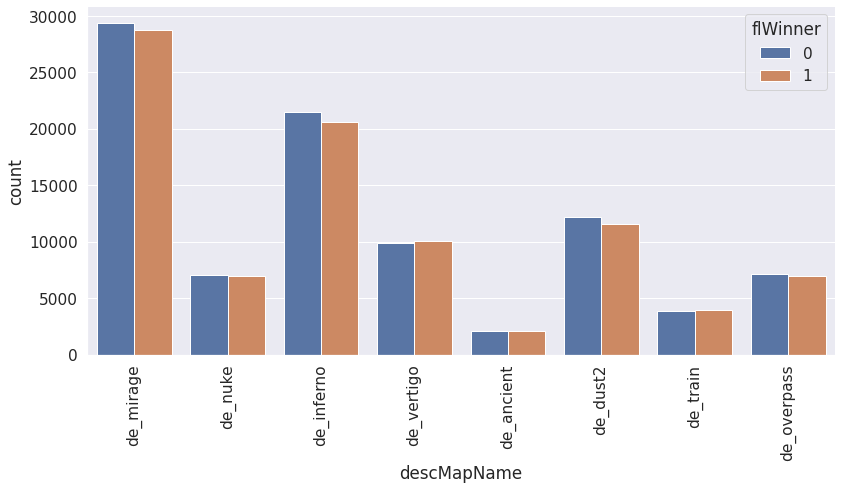

I assume a categorical feature does not involve any numeric value.

['Geography', 'Gender']


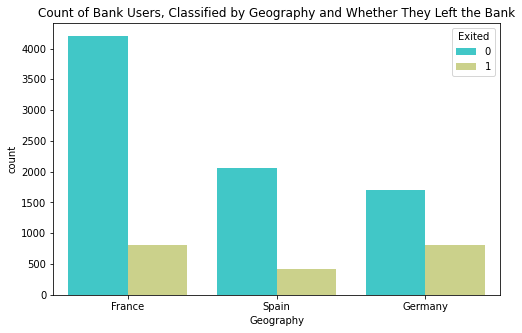

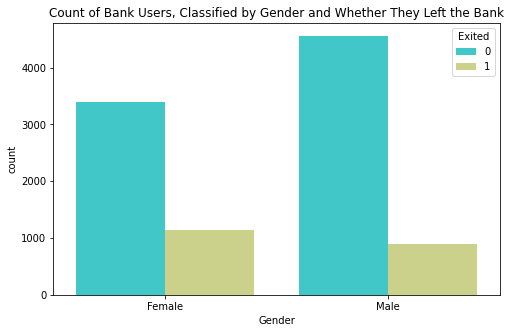

In [4]:
## YOUR CODE HERE

# 1. Find categorical features, 
print("I assume a categorical feature does not involve any numeric value.\n")
identity_list = ["RowNumber", "CustomerId", "Surname"]
categorical_column = [column for column in df.columns if df[column].dtype == "object" and column not in identity_list]
print(categorical_column)

# 2. Draw side-by-side histograms for each categorical feature
for c in categorical_column:
    plt.figure(figsize=(8,5))
    sns.countplot(x=c,data=df, palette='rainbow', hue='Exited')
    plt.title(f"Count of Bank Users, Classified by {c} and Whether They Left the Bank")



**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

In [5]:
## YOUR CODE HERE
from sklearn.model_selection import train_test_split
print(df['Exited'].value_counts()/len(df))
X = df.drop("Exited", axis = 1)

# Impute values for further decision tree task
X["CreditScore"].fillna(value = X["CreditScore"].mean(), inplace=True)
X["Balance"].fillna(value = X["Balance"].mean(), inplace=True)
X["EstimatedSalary"].fillna(value = X["EstimatedSalary"].mean(), inplace=True)

y = df['Exited']
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train, X_val, y_train, y_val =  train_test_split(X_dev, y_dev, test_size = 0.25, random_state = 0, stratify = y_dev)


0    0.7963
1    0.2037
Name: Exited, dtype: float64


**<font color = 'red'>Ans:</font>
I used the method of stratified splitting, since the labels in the "Exited" feature are imbalanced. There are 80% of "0" labels.**

**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**

In [6]:
## YOUR CODE HERE

"""
No need for target encoding, since categorical features do not have high cardinality. 
Just apply ordinal 
"""
from sklearn.preprocessing import OneHotEncoder
for column in categorical_column:    
    enc = OneHotEncoder()    

    X_train_t = enc.fit_transform(X_train[[column]])
    X_train[list(X_train[column].unique())] = X_train_t.toarray()
    X_train = X_train.drop(column, axis = 1)
    
    X_val_t = enc.fit_transform(X_val[[column]])
    X_val[list(X_val[column].unique())] = X_val_t.toarray()
    X_val = X_val.drop(column, axis = 1)
    
    X_test_t = enc.fit_transform(X_test[[column]])
    X_test[list(X_test[column].unique())] = X_test_t.toarray()
    X_test = X_test.drop(column, axis = 1)
    

**<font color = 'red'>Ans:</font>
No, I would say feature scaling is not necessary, since I assume we would apply decision tree to this dataset. Decision tree is not a distance-based model, yet it rather depends on condition comparison.**

**1.6: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

In [7]:
## YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)
predict_val1 = dt1.predict(X_val)
predict_test1 = dt1.predict(X_test)
print(f"The accuracy score of validation data is: {accuracy_score(y_val, predict_val1)}")
print(f"The accuracy score of test data is: {accuracy_score(y_test, predict_test1)}")

The accuracy score of validation data is: 0.8035
The accuracy score of test data is: 0.808


**1.7: Visualize the trained tree until the max_depth 8**

In [8]:
! pip install graphviz

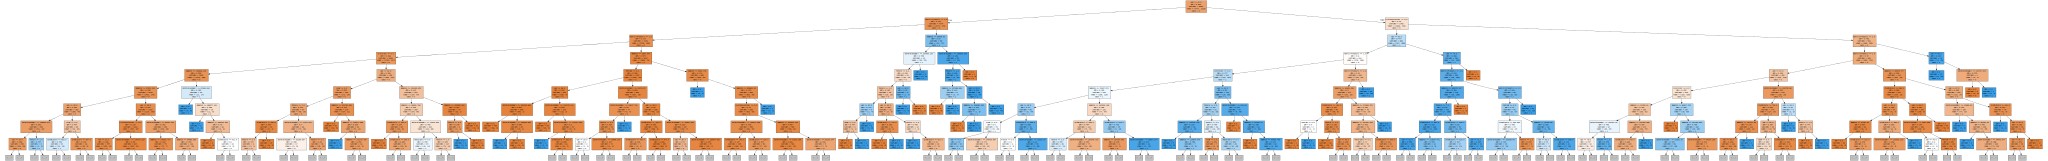

In [9]:
# YOUR CODE HERE
from sklearn import tree
# fig = plt.figure(figsize=(50,40))
# _ = tree.plot_tree(dt1, feature_names = X_train.columns, class_names = "Exited", max_depth = 8, filled = True)
# fig.savefig("decistion_tree.png")

import graphviz
dt1_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=["0", "1"],
                                max_depth = 8,
                                filled=True)

# Draw graph
graph = graphviz.Source(dt1_data, format="png") 
graph

**1.8: Prune the tree using one of the techniques discussed in class and evaluate the performance**

In [10]:
# Check for the training accuracy before pruning, Yes it seems there is an overfitting problems
print(f"The accuracy score of train data is: {accuracy_score(y_train, dt1.predict(X_train))}")

The accuracy score of train data is: 1.0


In [11]:
## YOUR CODE HERE

# Apply cost complexity pruning 
path = dt1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
accuracy_list = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    accuracy_list.append(accuracy_score(y_val, dt.predict(X_val)))



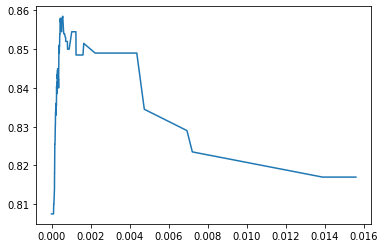

The highest accuracy is reached when alpha is 0.0005720256122785303


In [12]:
plt.plot(ccp_alphas[:-1], accuracy_list[:-1])
plt.show()
max_alpha = ccp_alphas[accuracy_list.index(max(accuracy_list))]
print(f"The highest accuracy is reached when alpha is {max_alpha}")

In [13]:
dt2 = DecisionTreeClassifier(ccp_alpha=max_alpha)
dt2.fit(X_train, y_train)
predict_val2 = dt2.predict(X_val)
predict_test2 = dt2.predict(X_test)
print(f"The accuracy score of train data is: {accuracy_score(y_train, dt2.predict(X_train))}")
print(f"The accuracy score of validation data is: {accuracy_score(y_val, predict_val2)}")
print(f"The accuracy score of test data is: {accuracy_score(y_test, predict_test2)}")

The accuracy score of train data is: 0.8771666666666667
The accuracy score of validation data is: 0.8585
The accuracy score of test data is: 0.85


**1.9: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

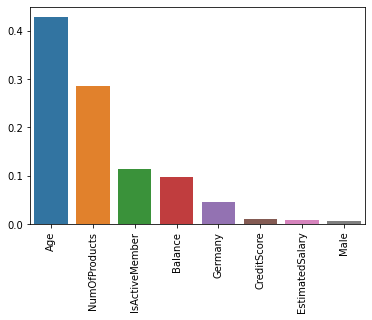

In [14]:
## YOUR CODE HERE
feature_importance1 = zip(X_train.columns, dt2.feature_importances_)
features, importances = zip(*(sorted(list(filter(lambda x: x[1]!=0, feature_importance1)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(features), list(importances))
ax.tick_params(axis='x', rotation = 90)
plt.show()

**<font color = 'red'>Ans:</font>
The 3 most important features are age, number of Products, and whether is an active member. First, age is a reasonable feature that affects customer choice, as age correlates to a person's intellectual ability and experience in dealing with financial situations. Second, the number of products also make sense. If you have tons of financial products within this bank, you are more likely to stay in the book. Third, the active level also makes sense. If you are an active member, it implies that you still pursue bank services, which indicate you are likely to continue staying in this bank.**

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [15]:
## YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)
rf1_predict_test1 = rf1.predict(X_test)
print(f"The accuracy score of the test dataset is {accuracy_score(y_test, rf1_predict_test1)}")

The accuracy score of the test dataset is 0.8555


**<font color = red>Ans:</font> Yes it is better.** 

**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [16]:
## YOUR CODE HERE
rf1.get_params()["min_samples_split"] == 2 and dt2.get_params()["max_depth"] == None

True

**<font color = red>Ans:</font> Yes. I would first verify if the max_depth of the random forest is "None". If it is None, it means that nodes are expanded until all leaves are pure or until all leaves contains less than min_samples_split samples. The first condition of "all leaves being pure" validates that the random forest model has pure leaves, yet there is a second condition. So second I would check if the "min_samples_split" equals to 2, which indicates that if a node finishes expansion due to samples less than 2, it has to have only 1 sample, which is also pure.** 

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


**<font color = red>Ans:</font> I would choose n_estimators and max_depth. First it is intuitive to choose n_estimators in a random forest model since I think the whole point of random forest is taking average results from multiple trees, so the number of tree is definitely important. Second, my intuition comes from Part 1.7 where I visualized a decision tree. For this dataset and model, I think the depth is quite great due to the features, so I intend to try increase the max_depth to improve performance** 

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [17]:
dt3 = DecisionTreeClassifier(ccp_alpha=max_alpha, max_depth = 8)
dt3.fit(X_train, y_train)
predict_val3 = dt3.predict(X_val)
predict_test3 = dt3.predict(X_test)
print(f"The accuracy score of train data is: {accuracy_score(y_train, dt3.predict(X_train))}")
print(f"The accuracy score of validation data is: {accuracy_score(y_val, predict_val3)}")
print(f"The accuracy score of test data is: {accuracy_score(y_test, predict_test3)}")

The accuracy score of train data is: 0.8751666666666666
The accuracy score of validation data is: 0.854
The accuracy score of test data is: 0.85


**<font color = red>Ans:</font> 1. The default value of n_estimators is 100. So I would use 100 as a unite length, to try the range [200, 300, 400, 500, 600]. I chose value greater than 100 since I want to have more trees to average out some effects caused by outliers. 2. The max depth by default is None, so I do not know the exact depth of a tree, but I found that for this dataset, having max_depth = 8 will result into slightly lower accuracy. Thus, I will use 8 as the middle value of my list and explore both higher and lower depth values. Thus my range is [4, 6, 8, 10, 12].** 

**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [18]:
## YOUR CODE HERE
from sklearn.model_selection import cross_val_score
n_trees = [200, 300, 400, 500, 600]
depth_list = [4,6,8,10,12]

tree_scores = []
for n in n_trees:
    rf = RandomForestClassifier(n_estimators = n)
    rf.fit(X_train, y_train)
    scores = cross_val_score(rf, X_val, y_val, cv=5)
    tree_scores.append(np.mean(scores))

tree_scores


[0.842, 0.8425, 0.8425, 0.8414999999999999, 0.8430000000000002]

In [19]:
best_n_estimator = n_trees[tree_scores.index(max(tree_scores))]
best_n_estimator

600

In [20]:
depth_scores = []
for d in depth_list:
    rf = RandomForestClassifier(n_estimators = best_n_estimator, max_depth = d)
    rf.fit(X_train, y_train)
    scores = cross_val_score(rf, X_val, y_val, cv=5)
    depth_scores.append(np.mean(scores))

depth_scores

[0.8244999999999999, 0.8414999999999999, 0.844, 0.844, 0.8450000000000001]

In [21]:
best_max_depth = depth_list[depth_scores.index(max(depth_scores))]
best_max_depth

12

In [22]:
print(f"The optimal n_estimator is {best_n_estimator}, and the optimal max_depth is {best_max_depth}")
rf_final = RandomForestClassifier(n_estimators = best_n_estimator, max_depth = best_max_depth)
rf_final.fit(X_train, y_train)

print(f"The accuracy score of the test dataset is {accuracy_score(y_test, rf_final.predict(X_test))}")

The optimal n_estimator is 600, and the optimal max_depth is 12
The accuracy score of the test dataset is 0.8585


**<font color = red>Ans:</font> It is slightly less than the vanilla model**

**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

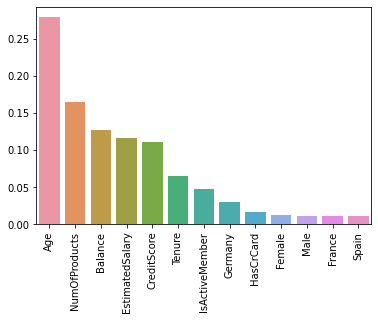

In [23]:
## YOUR CODE HERE
feature_importance2 = zip(X_train.columns, rf_final.feature_importances_)
features, importances = zip(*(sorted(list(filter(lambda x: x[1]!=0, feature_importance2)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(features), list(importances))
ax.tick_params(axis='x', rotation = 90)
plt.show()

**<font color = red>Ans:</font> The top 2 are the same, and the 3rd becomes "Balance". I think this one makes more sense, as "Balance" should be more important than whether a member is active, since a decent amount of balance already reflects that a member is active. Plus, "Balance" could reflect extra information.**

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.**

In [24]:
## YOUR CODE HERE
from sklearn.ensemble import GradientBoostingClassifier
import time 

startTime = time.time()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_split = [2,3,4,5,6]

final_score = []
for i in range(len(n_estimators)):
    n = n_estimators[i]
    l = learning_rate[i]
    m = min_samples_split[i]
    gb = GradientBoostingClassifier(n_estimators = n, learning_rate=l, min_samples_split=m)
    gb.fit(X_train, y_train)
    scores = cross_val_score(gb, X_val, y_val, cv=5)
    final_score.append(np.mean(scores))

max_index = final_score.index(max(final_score))
endTime = time.time()
test_score = accuracy_score(y_test, gb.predict(X_test))
print(f"The optimal hyperparameter sets are n_estimator = {n_estimators[max_index]}, learning_rate = {learning_rate[max_index]}, min_samples_split = {min_samples_split[max_index]}")
print(f"The time taken is {endTime-startTime}")
print(f"The test dataset has an accuracy of {test_score}")


The optimal hyperparameter sets are n_estimator = 100, learning_rate = 0.1, min_samples_split = 2
The time taken is 20.916112899780273
The test dataset has an accuracy of 0.843


In [25]:
from sklearn.ensemble import HistGradientBoostingClassifier
max_leaf_nodes = [31, 33, 35, 37, 39]
max_iter = [100, 120, 140, 160, 180]

startTime = time.time()
final_score = []
for i in range(len(learning_rate)):
    m1 = max_leaf_nodes[i]
    l = learning_rate[i]
    m2 = max_iter[i]
    hg = HistGradientBoostingClassifier(max_leaf_nodes=m1, learning_rate=l, max_iter=m2)
    hg.fit(X_train, y_train)
    scores = cross_val_score(hg, X_val, y_val, cv=5)
    final_score.append(np.mean(scores))

max_index = final_score.index(max(final_score))
endTime = time.time()
test_score = accuracy_score(y_test, hg.predict(X_test))
print(f"The optimal hyperparameter sets are max_leaf_nodes = {max_leaf_nodes[max_index]}, learning_rate = {learning_rate[max_index]}, max_iter = {max_iter[max_index]}")
print(f"The time taken is {endTime-startTime}")
print(f"The test dataset has an accuracy of {test_score}")


The optimal hyperparameter sets are max_leaf_nodes = 31, learning_rate = 0.1, max_iter = 100
The time taken is 16.976029872894287
The test dataset has an accuracy of 0.8345


**3.2: Train an XGBoost model by tuning 3 hyperparameters using 10 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [26]:
! pip install xgboost

In [27]:
## YOUR CODE HERE
from xgboost import XGBClassifier
final_score = []
for i in range(len(learning_rate)):
    n = n_estimators[i]
    l = learning_rate[i]
    m = max_leaf_nodes[i]
    xg = XGBClassifier(n_estimators=n, learning_rate=l, max_leaves=m)
    xg.fit(X_train, y_train)
    scores = cross_val_score(xg, X_val, y_val, cv=10)
    final_score.append(np.mean(scores))
max_index = final_score.index(max(final_score))

xg1 = XGBClassifier(n_estimators = n_estimators[max_index], learning_rate = learning_rate[max_index], max_leaves = max_leaf_nodes[max_index])
xg1.fit(X_train, y_train)
print(f"The test dataset has an accuracy of {accuracy_score(y_test, xg1.predict(X_test))}")

The test dataset has an accuracy of 0.853


**<font color = red>Ans:</font> The accuray is greater than both model result.**

**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

**<font color = red>Ans:</font> The test dataset result in Q1.6 is 0.808, while it is 0.8575 in Q2.1. Both HistGradientBossting Classifier and GradientBoostingClassifier results have higher accuracy than normal decision tree like in Q1.6, but less accurate than random forest classifier in Q2.1. The best model is the XGBoost, while the worst is normal decision tree classifier. I would choose XGBoost since it has the greatest accuracy.**


**3.4: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

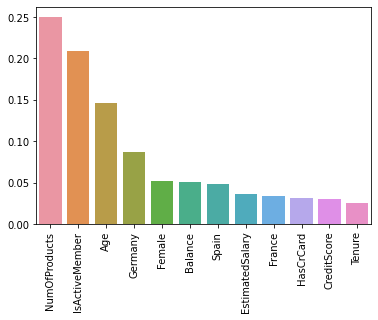

In [34]:
## YOUR CODE HERE
feature_importance3 = zip(X_train.columns, xg1.feature_importances_)
features, importances = zip(*(sorted(list(filter(lambda x: x[1]!=0, feature_importance3)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(features), list(importances))
ax.tick_params(axis='x', rotation = 90)
plt.show()

**<font color = red>Ans:</font> The top 3 features are the same, but the age feature moves from top 1 important to the 3rd important, while number of products move from 2nd to 1st, and is active number moves from 3rd to 2nd. I trust this one, since I do not think age should be the most important factor, as it seems both younger age and elder ages have some reasons to leave or stay a bank. Intuitively there should be no clear correlation.**

**3.5: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [29]:
## YOUR CODE HERE
feature_list = list(features[:7])
final_score = []
for i in range(len(learning_rate)):
    n = n_estimators[i]
    l = learning_rate[i]
    m = max_leaf_nodes[i]
    xg = XGBClassifier(n_estimators=n, learning_rate=l, max_leaves=m)
    xg.fit(X_train[feature_list], y_train)
    scores = cross_val_score(xg, X_val[feature_list], y_val, cv=10)
    final_score.append(np.mean(scores))
max_index = final_score.index(max(final_score))

xg = XGBClassifier(n_estimators = n_estimators[max_index], learning_rate = learning_rate[max_index], max_leaves = max_leaf_nodes[max_index])
xg.fit(X_train[feature_list], y_train)
print(f"The test dataset has an accuracy of {accuracy_score(y_test, xg.predict(X_test[feature_list]))}")

The test dataset has an accuracy of 0.8245


**<font color = red>Ans:</font> The accuracy is slightly lower than Q3.2. I think this is caused by the fact that this XGBoost model is different from the previous 2 models, as it is closer to a uniform discrete distribution. In other words, even though the top features are the same, they share less importance percentage. That is to say, those features discarded play a more important role than those in the previous 2 models, and simply removing them causes lower accuracy.**

## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [30]:
## YOUR CODE HERE
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, xg1.predict(X_test))

0.147

**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

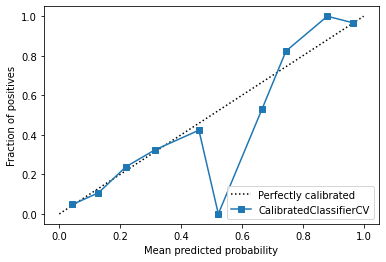

In [31]:
## YOUR CODE HERE
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay
cal_svc1 = CalibratedClassifierCV(xg1, cv = "prefit", method="isotonic")
cal_svc1.fit(X_val, y_val)
cal_predict1 = cal_svc1.predict(X_test)
display = CalibrationDisplay.from_estimator(cal_svc1, X_test, y_test, n_bins=10)

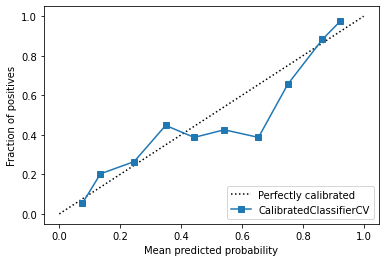

In [32]:
cal_svc2 = CalibratedClassifierCV(xg1, cv = "prefit", method="sigmoid")
cal_svc2.fit(X_val, y_val)
cal_predict2 = cal_svc2.predict(X_test)
display = CalibrationDisplay.from_estimator(cal_svc2, X_test, y_test, n_bins=10)

**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [33]:
## YOUR CODE HERE0
print(f"The brier score for isotnic regression is: {brier_score_loss(y_test, cal_predict1)}")
print(f"The brier score for Platt Scaling is: {brier_score_loss(y_test, cal_predict2)}")

The brier score for isotnic regression is: 0.1435
The brier score for Platt Scaling is: 0.146


**<font color = red>Ans:</font> Yes, it helps having better predicted probabilities.**